# Linear Superposition
## Linear Superposition is a Critical Modeling Concept for Linear Elastic FEM
## Outcomes: 
## 1. Confirm that linear superposition holds for FEM.
## 2. Ability to use linear superposition to calculate the solutions for loads applied at once from solutions of the loads applied individually.
## 3. Ability to use linear superposition to calculate the solution for a load applied at one  magnitude, from the solution of the load applied with a different magnitude.
## 4. Ability to use linearity to calculate the solution to a problem, when the material has one  Elastic Modulus, from the solution of the same problem solved using a material with another Elastic Modulus.
# Problem:
## A steel bar (E=210GPa) with 1mm thickness is constrained by rollers on the left edge, while being fixed at the bottom left corner (as seen in the Figure). A force of 100N is applied uniformly over the right edge of the bar. This geometry is modelled by 4, Q8 elements along its length as shown below.

<img src="SP_Bar_1x4_2.png" style="width: 600px;"/>

## Do a hand calculation to determine the stress and displacement experienced by the bar. Compare the hand calculation results to the FEM results in the post-processing plots and the displacement vector.
## Recall from MOW227 that the axial displacement for a uniform prismatic section is:
## $$\delta = \frac{FL}{AE}$$


 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0050 seconds.
Done assembling K and F    :   0.0080 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0020 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


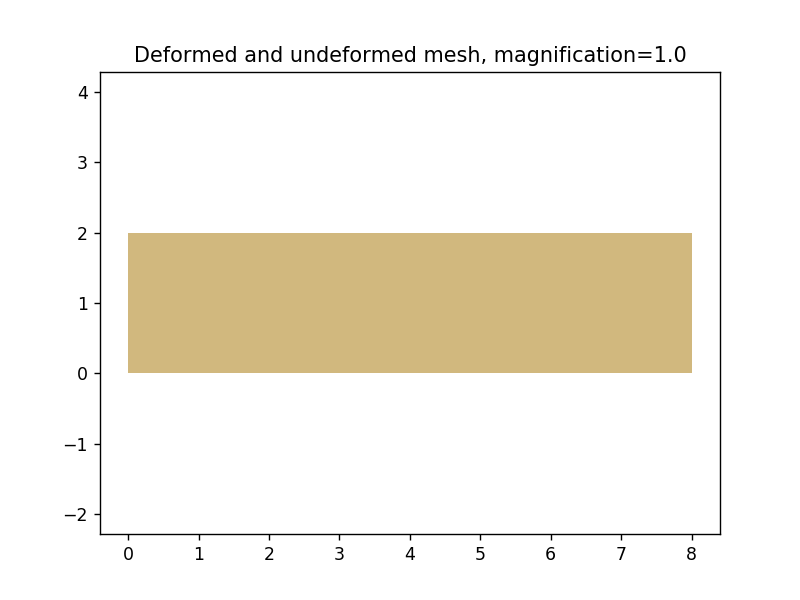

<IPython.core.display.Javascript object>


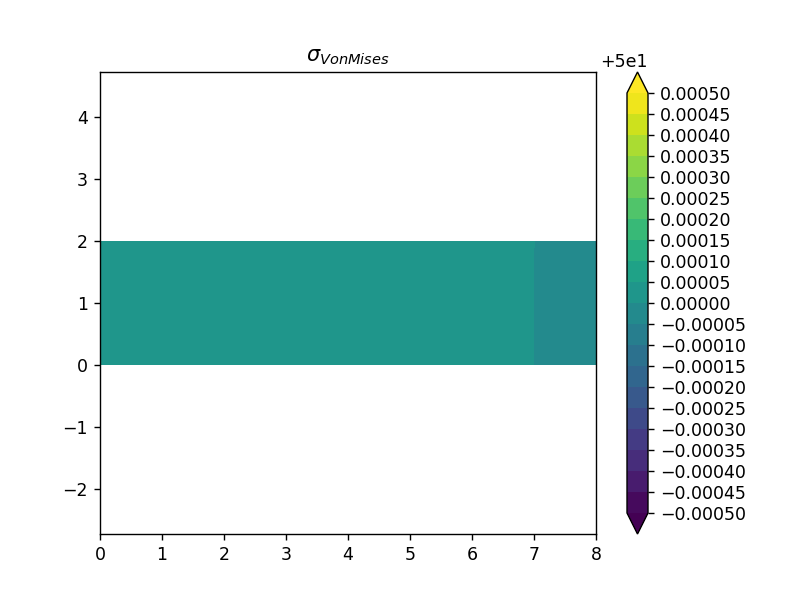

<IPython.core.display.Javascript object>


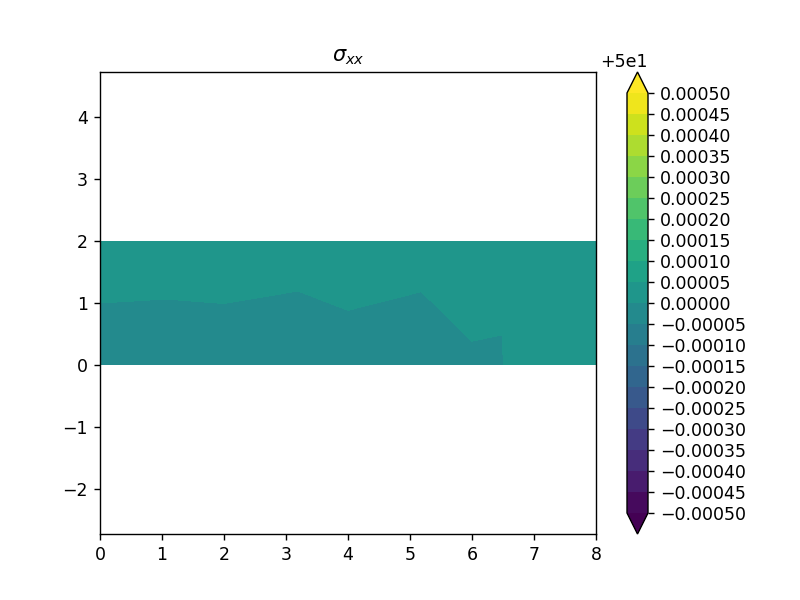

<IPython.core.display.Javascript object>


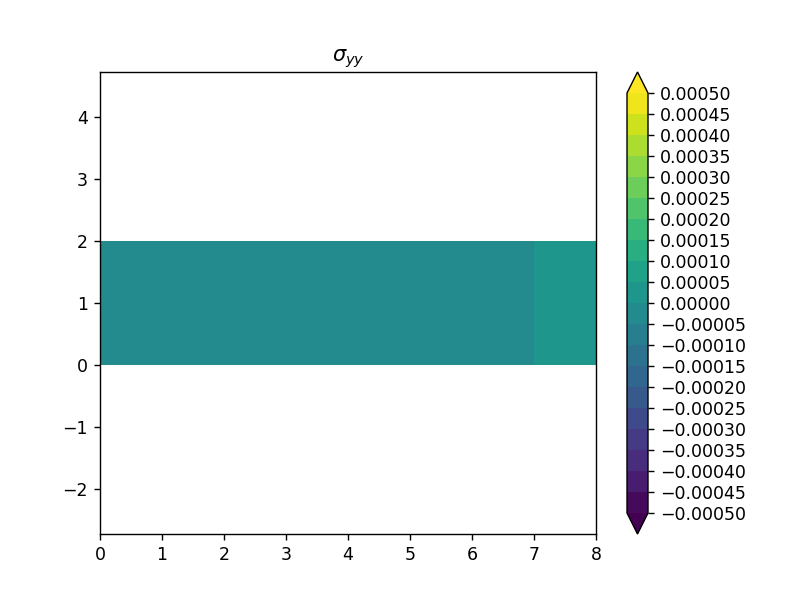

<IPython.core.display.Javascript object>


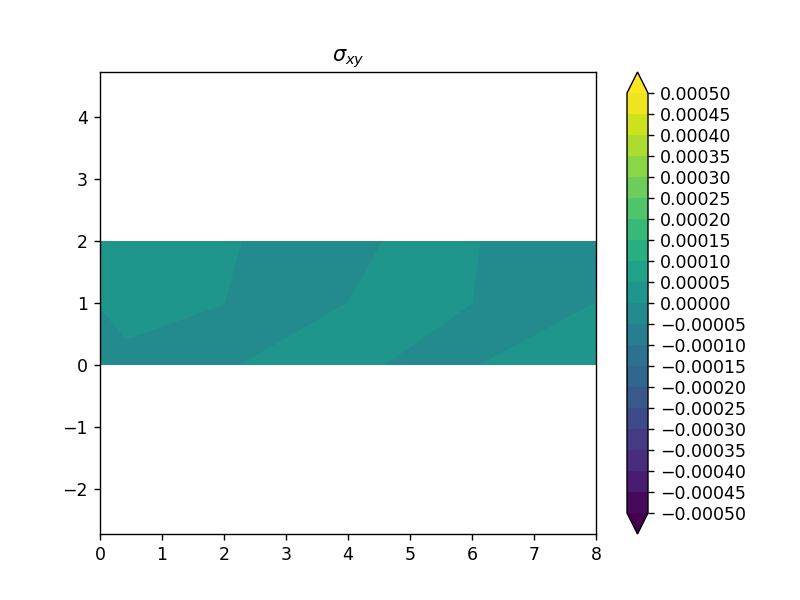

In [37]:
%matplotlib notebook

import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull')

u100 = U  # Store entire computed displacement field

Using units N, mm which results in MPa
displacement_tip = F*L/(A*E) = 100*8/(2*2.1E5) = 0.001905 mm

Input file Nodes:
*NODE
1 0 0

2 1 0

3 2 0

4 3 0

5 4 0

6 5 0

7 6 0

8 7 0

9 8 0

10 0 1

11 2 1

12 4 1

13 6 1

14 8 1

15 0 2

16 1 2

17 2 2

18 3 2

19 4 2

20 5 2

21 6 2

22 7 2

23 8 2

Hence Nodes 9, 14 and 23 are at the end of the beam i.e. x = 8mm

In [38]:
print('Displacement {} at node 9 in x-direction (2*Node Number - 2 = 2*9 - 2)'.format(U[2*9-2]))
print('Displacement {} at node 14 in x-direction (2*Node Number - 2 = 2*14 - 2)'.format(U[2*14-2]))
print('Displacement {} at node 23 in x-direction (2*Node Number - 2 = 2*23 - 2)'.format(U[2*23-2]))
print('Exactly the same as hand calc')

Displacement [0.00190476] at node 9 in x-direction (2*Node Number - 2 = 2*9 - 2)
Displacement [0.00190476] at node 14 in x-direction (2*Node Number - 2 = 2*14 - 2)
Displacement [0.00190476] at node 23 in x-direction (2*Node Number - 2 = 2*23 - 2)
Exactly the same as hand calc


## Copy the input file "Q8_pull.inp" and rename it "Q8_push.inp". Change the input file "Q8_push.inp" to represent a force of -73N applied uniformly in a compressive manner, i.e. F = -73N. Do a hand calculation to confirm the stress and displacement experienced by the bar. Compare the hand calculation results to the FEM results in the post-processing plots and the displacement vector.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0130 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


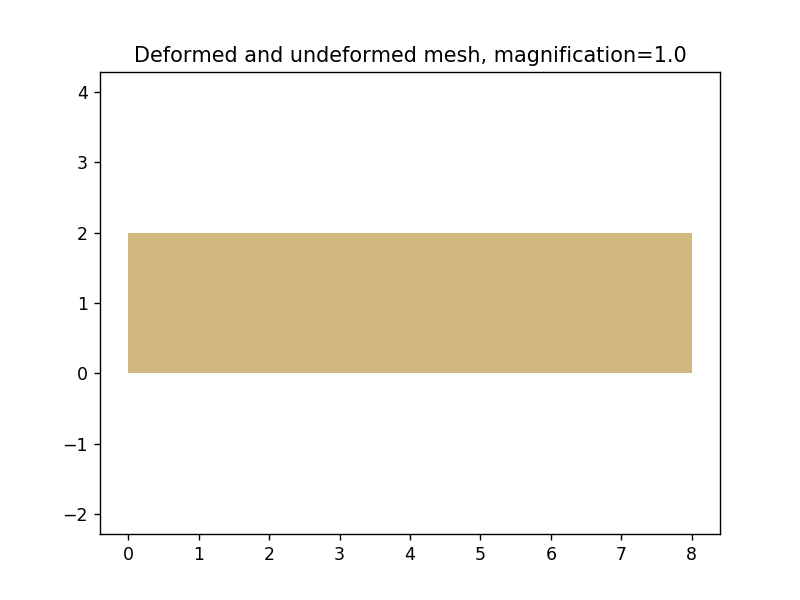

<IPython.core.display.Javascript object>


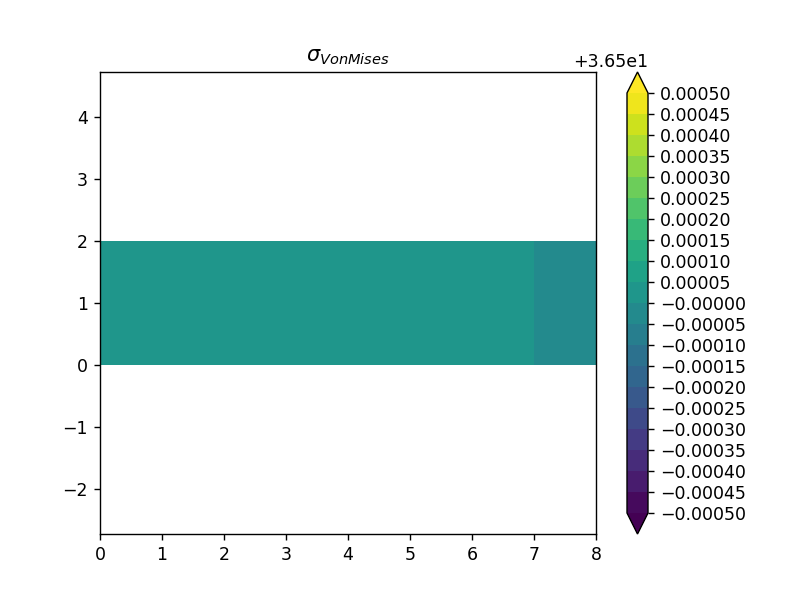

<IPython.core.display.Javascript object>


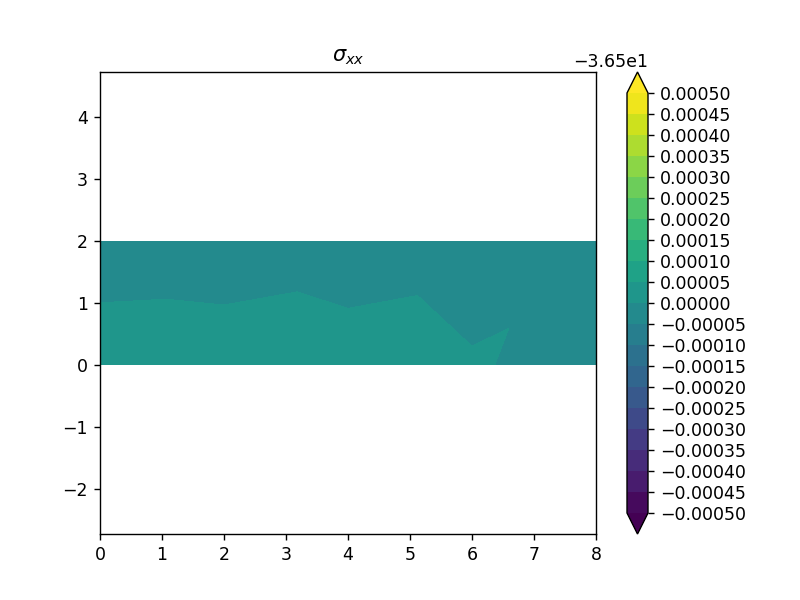

<IPython.core.display.Javascript object>


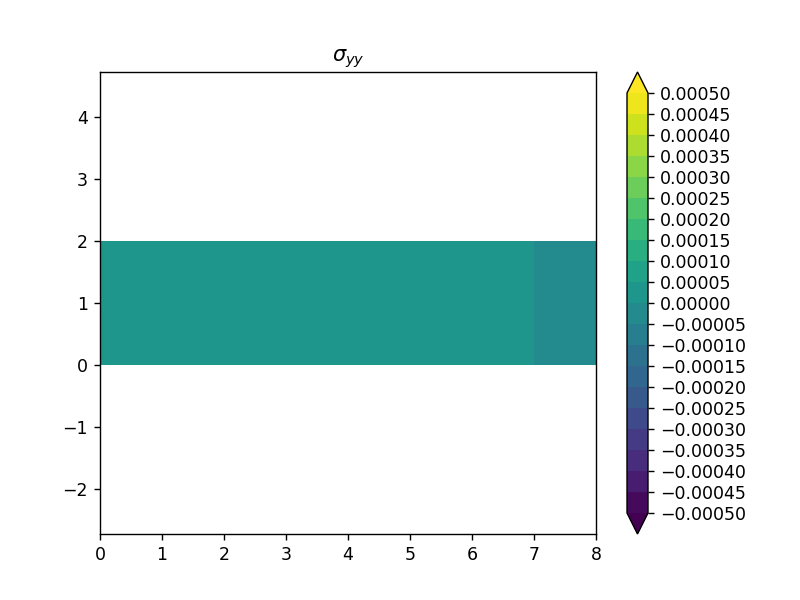

<IPython.core.display.Javascript object>


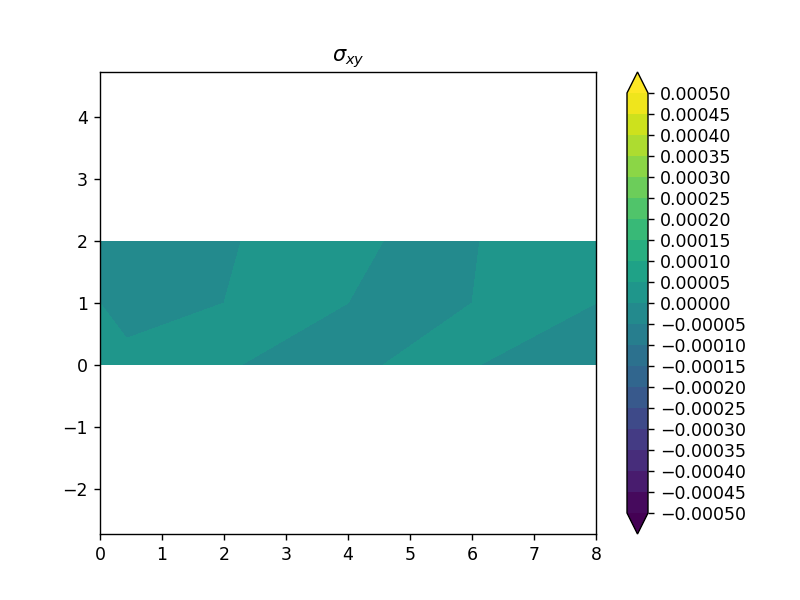

In [40]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_push')

um73 = U  # Store entire computed displacement field

## Now copy the input file "Q8_pull.inp" and rename it "Q8_pull27.inp". Change the input file to represent a force of 27N applied in tension. Do a hand calculation to confirm the stress and displacement experienced by the bar. Compare the hand calculation results to the FEM results in the post-processing plots and the displacement vector. Now add up the displacement results of the previous two analyses and compare the result to the displacement of the most recent analysis with 27N. Comment on the outcome?

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0000 seconds.
Done assembling K and F    :   0.0120 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0020 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


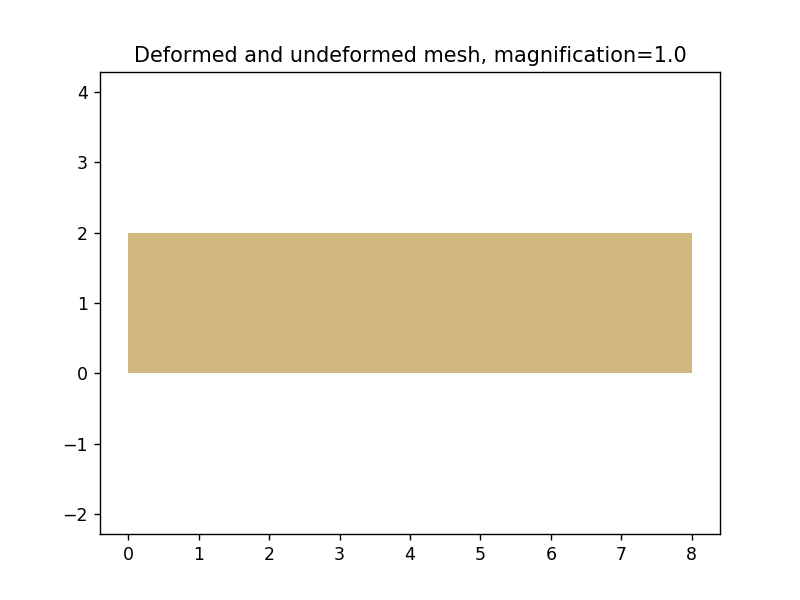

<IPython.core.display.Javascript object>


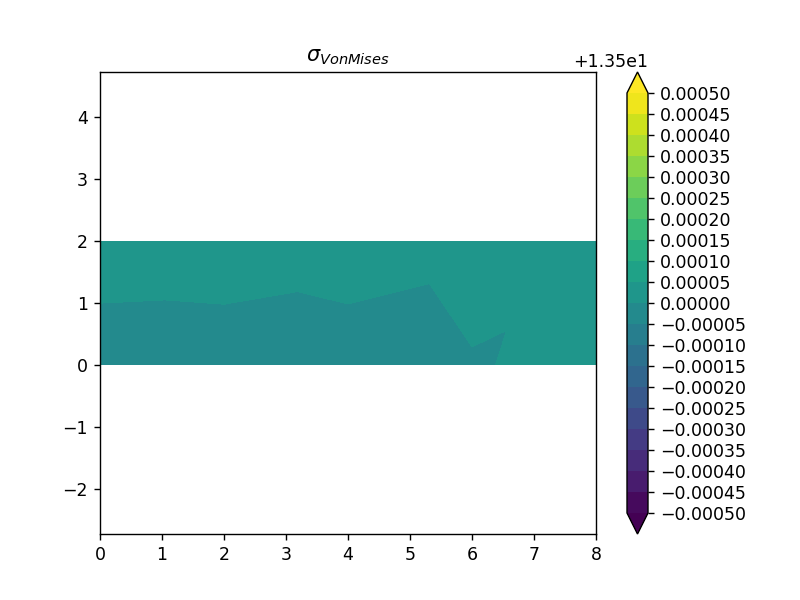

<IPython.core.display.Javascript object>


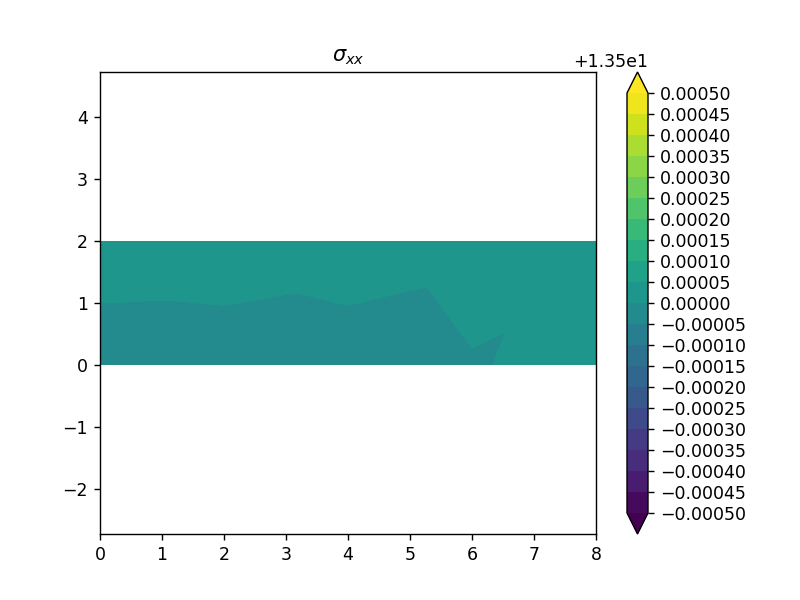

<IPython.core.display.Javascript object>


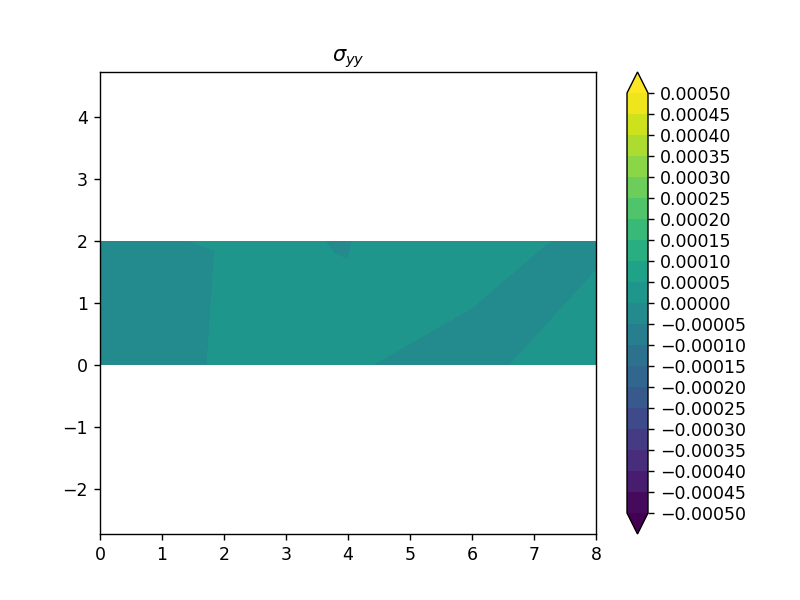

<IPython.core.display.Javascript object>


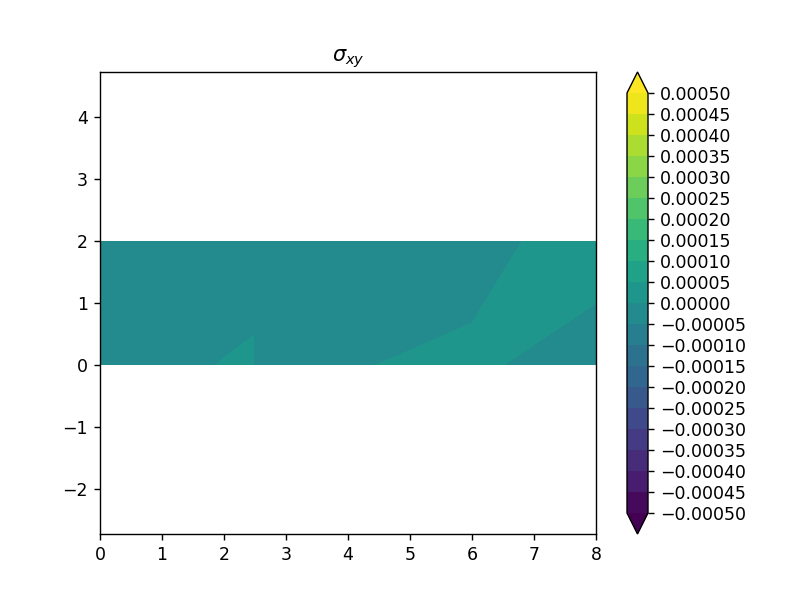

In [41]:
%matplotlib notebook

import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull27')

u27 = U  # Store entire computed displacement field

In [42]:
diff = u27 - (u100+um73) # Compute difference between simulation with 27N applied versus sum of 100N and -73N separately
print('Difference in displacement between applying 27N force in tension versus the sum of 100N in tension and 73N in compression {}'.format(diff))

Difference in displacement between applying 27N force in tension versus the sum of 100N in tension and 73N in compression [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.27621399e-14]
 [-8.28228816e-18]
 [-8.55076643e-14]
 [ 1.09723139e-16]
 [-1.29012442e-13]
 [ 2.73957560e-16]
 [-1.72596529e-13]
 [-4.20941493e-16]
 [-2.11959736e-13]
 [-1.31962905e-15]
 [-2.50981202e-13]
 [ 1.84841901e-15]
 [-3.14069463e-13]
 [ 7.31540344e-15]
 [-3.81558825e-13]
 [-2.74941609e-14]
 [ 0.00000000e+00]
 [ 1.28863086e-14]
 [-8.58320034e-14]
 [ 1.28855971e-14]
 [-1.70766071e-13]
 [ 1.28836964e-14]
 [-2.60745364e-13]
 [ 1.28810672e-14]
 [-3.23505871e-13]
 [ 1.28784041e-14]
 [ 0.00000000e+00]
 [ 2.57725834e-14]
 [-4.27615435e-14]
 [ 2.57804439e-14]
 [-8.55064446e-14]
 [ 2.56613985e-14]
 [-1.29010680e-13]
 [ 2.54955968e-14]
 [-1.72594306e-13]
 [ 2.61882733e-14]
 [-2.11956646e-13]
 [ 2.70846307e-14]
 [-2.50978491e-13]
 [ 2.39137662e-14]
 [-3.14066806e-13]
 [ 1.84439866e-14]
 [-3.81556332e-13]
 [ 5.32511386e-14]]


It is evident that the displacement difference is numerically 0 - hence linear superposition holds.

# A little investigation

## First Investigation: Make copies of all 3 previous input files and rename them to your choice. Apply an axial load of 100N and a vertical load of 10 kN as two independent analyses. Do a third analysis where both loads are applied at the same time.


 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0103 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


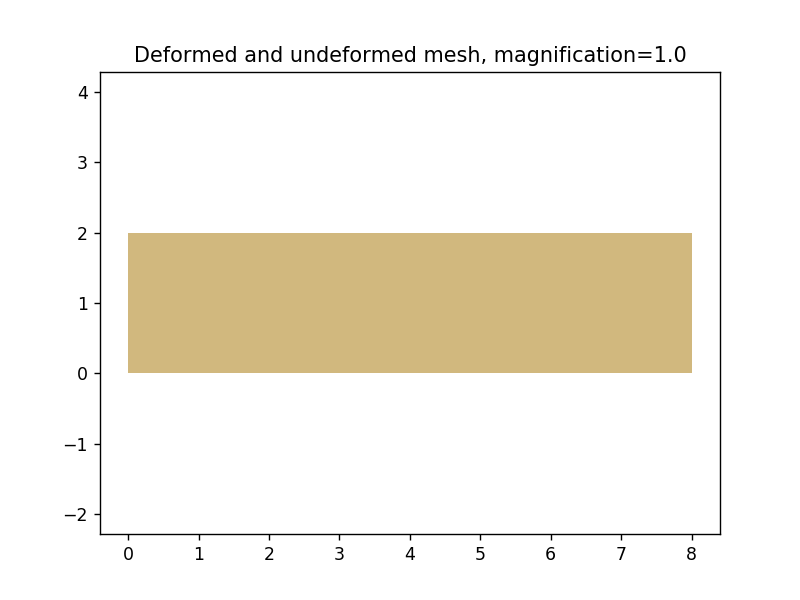

<IPython.core.display.Javascript object>


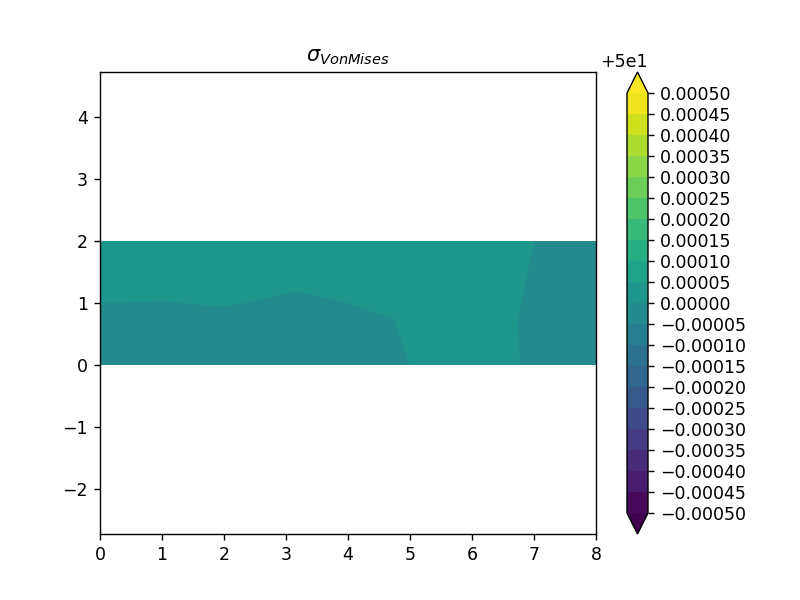

<IPython.core.display.Javascript object>


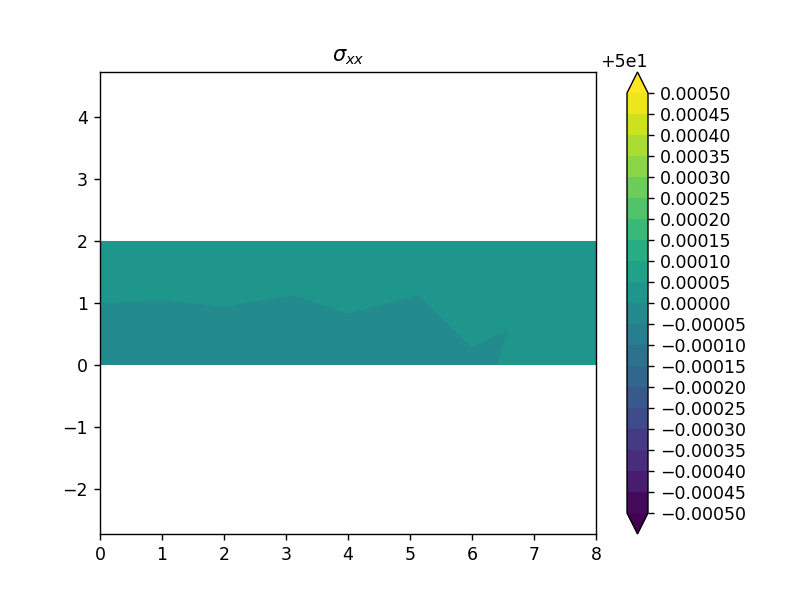

<IPython.core.display.Javascript object>


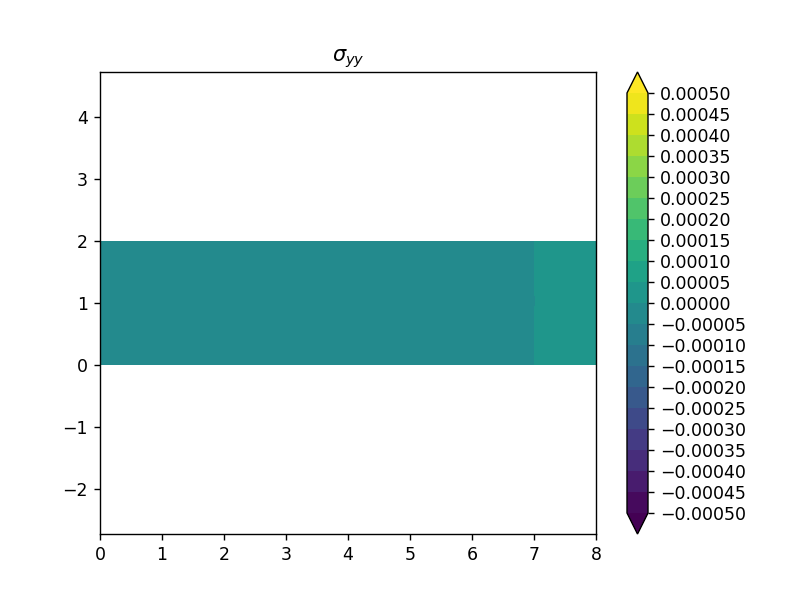

<IPython.core.display.Javascript object>


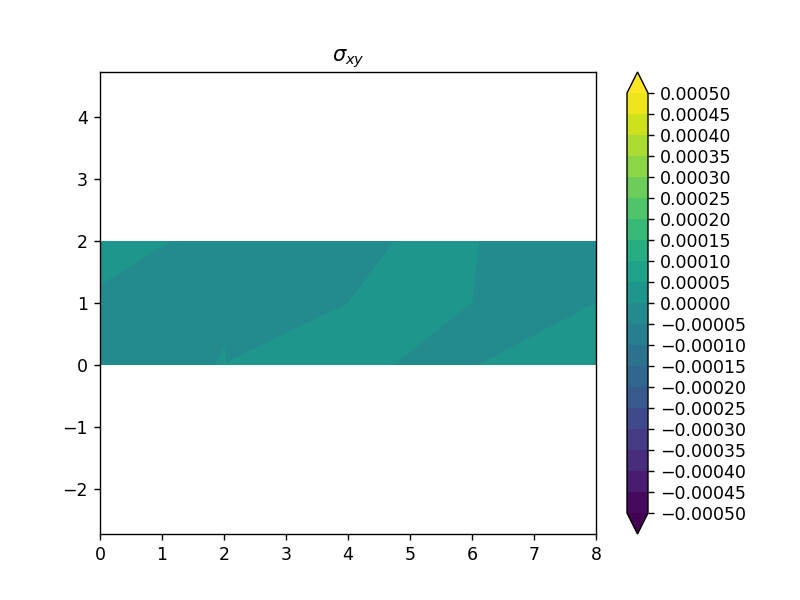

In [47]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull100')

u100 = U
VonMises100 = VonMises
SXX100 = SXX

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0070 seconds.
Done assembling K and F    :   0.0070 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


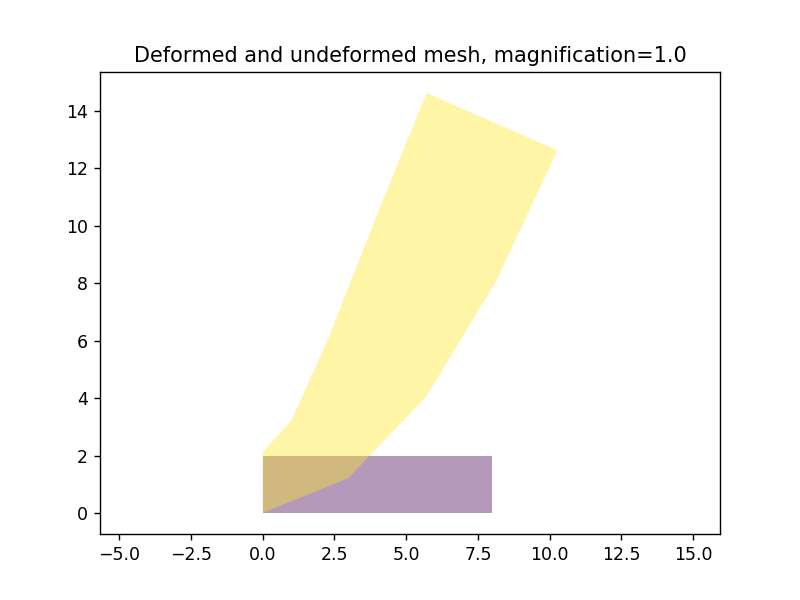

<IPython.core.display.Javascript object>


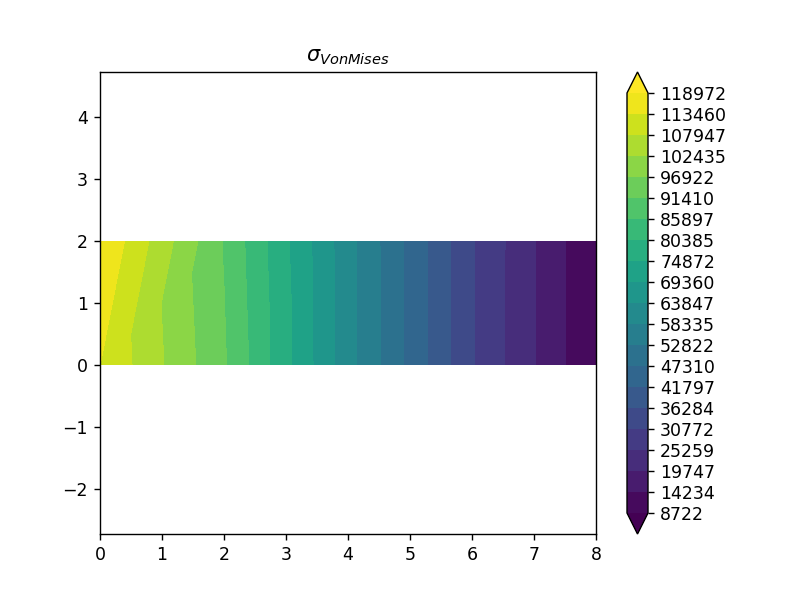

<IPython.core.display.Javascript object>


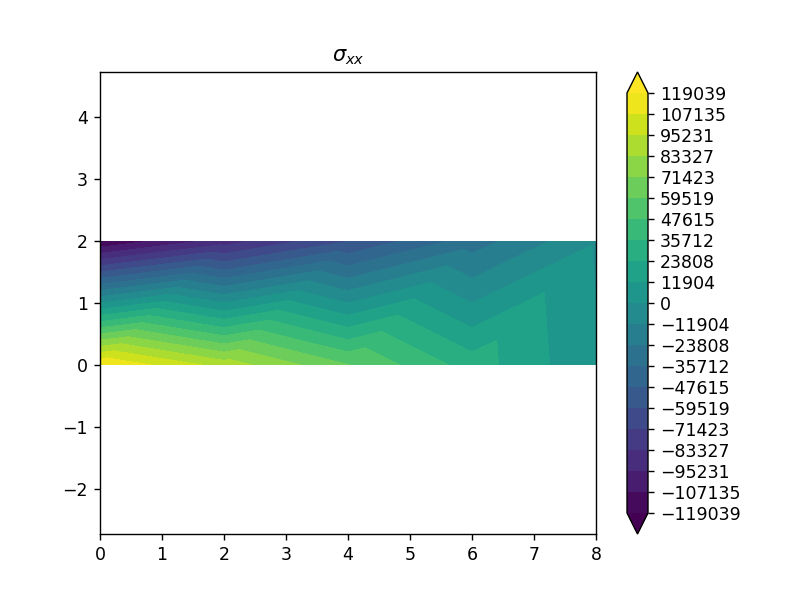

<IPython.core.display.Javascript object>


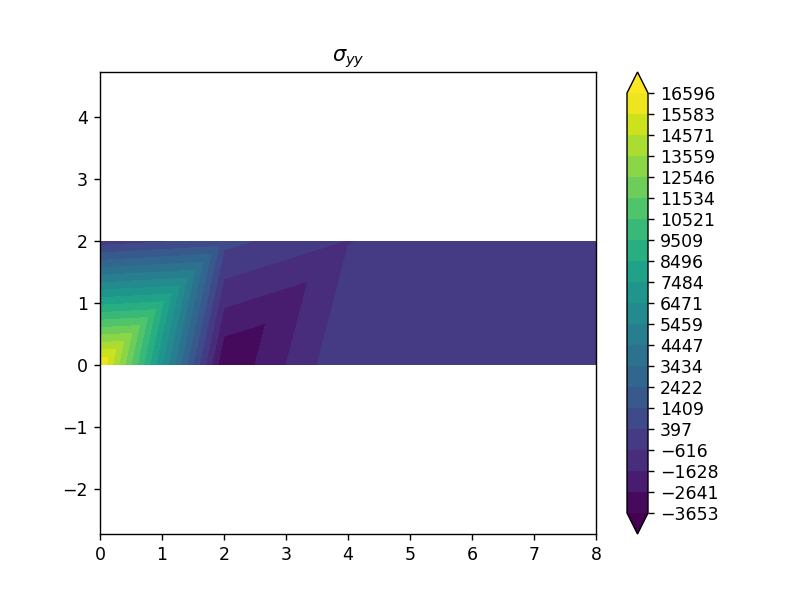

<IPython.core.display.Javascript object>


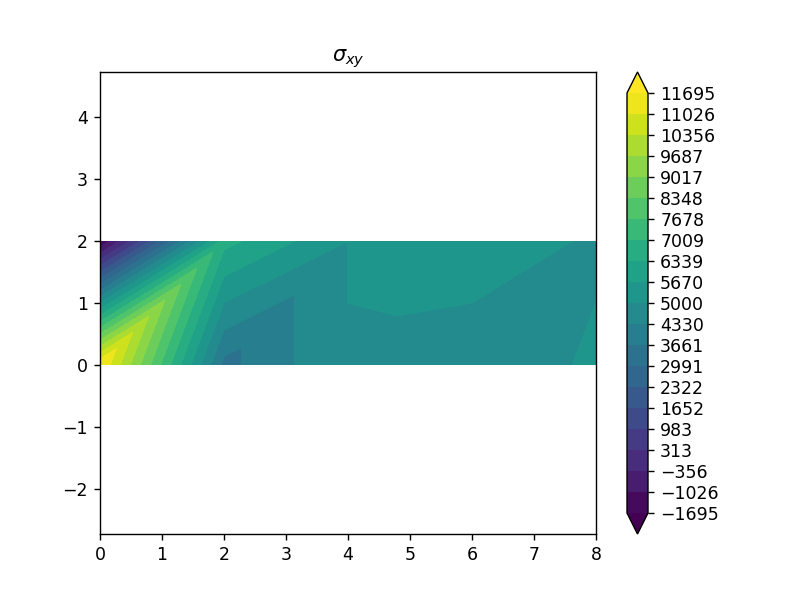

In [48]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_bend10k')

u10k = U
VonMises10k = VonMises
SXX10k = SXX

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0008 seconds.
Done assembling K and F    :   0.0264 seconds.
Done solving system        :   0.0007 seconds.
Done computing reactions   :   0.0004 seconds.
Done computing stresses    :   0.0138 seconds.
Done post-processing stress:   0.0094 seconds.
Done writing output        :   0.0012 seconds.


<IPython.core.display.Javascript object>


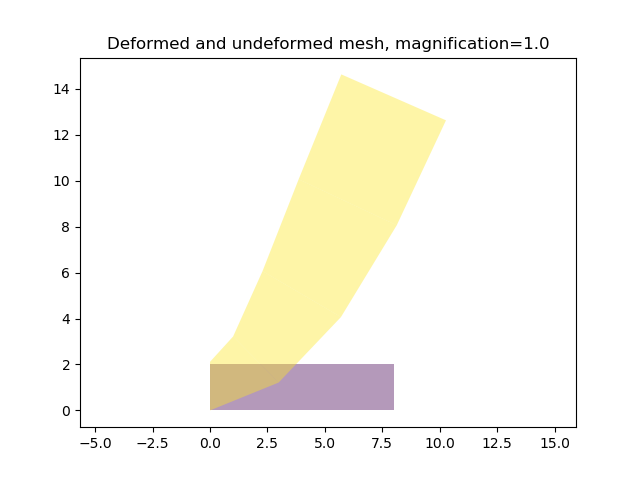

<IPython.core.display.Javascript object>


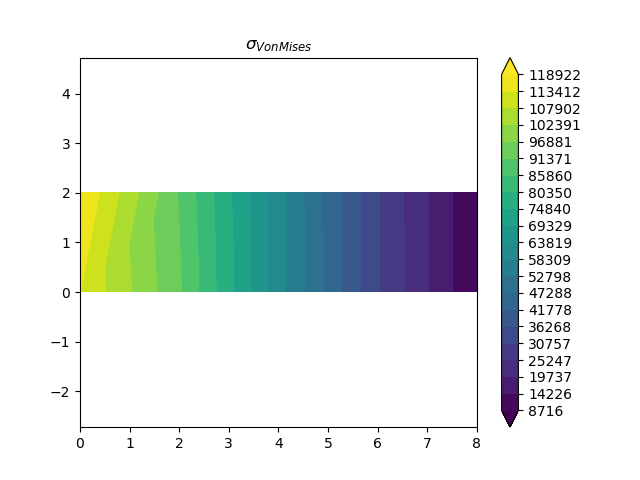

<IPython.core.display.Javascript object>


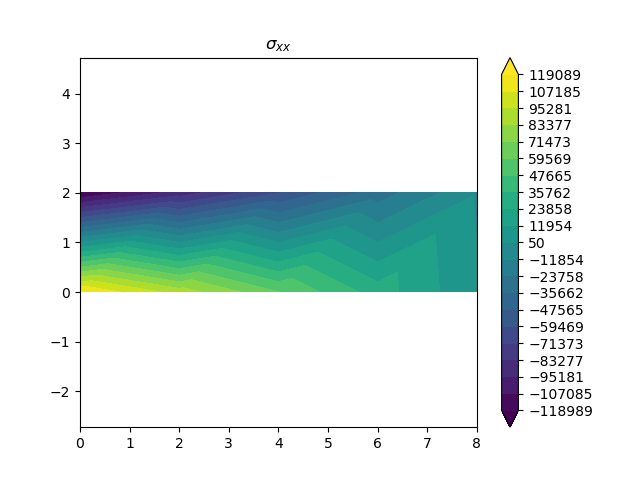

<IPython.core.display.Javascript object>


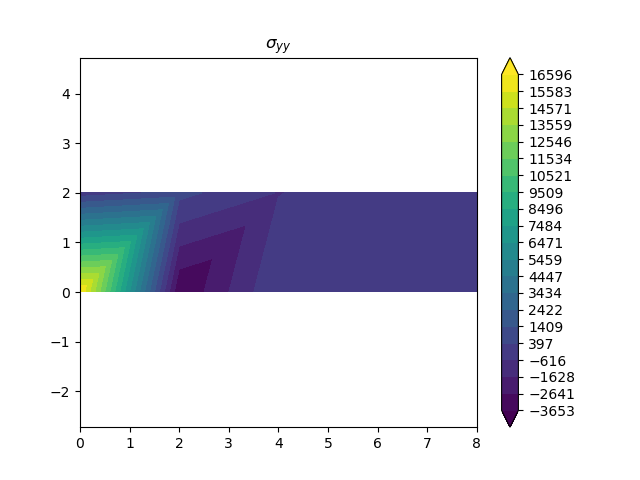

<IPython.core.display.Javascript object>


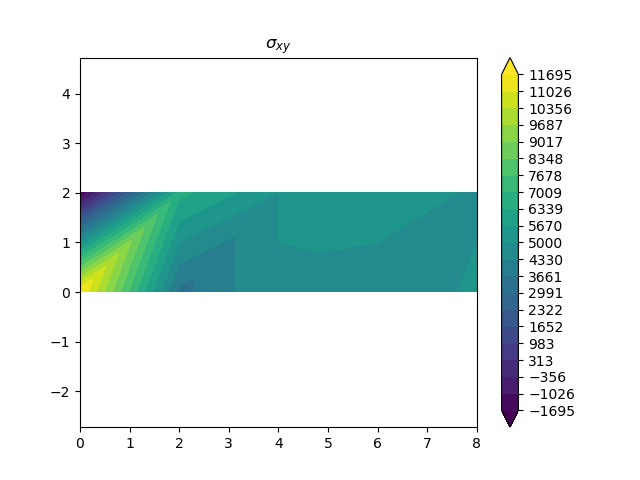

In [17]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull100_bend10k')

u100_10k = U
VonMises100_10k = VonMises
SXX100_10k = SXX

In [49]:
u100_10k - (u100 + u10k)

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.11022302e-16],
       [ 2.77555756e-16],
       [-8.88178420e-16],
       [ 4.44089210e-16],
       [-1.55431223e-15],
       [ 4.44089210e-16],
       [-1.33226763e-15],
       [ 0.00000000e+00],
       [-8.88178420e-16],
       [-1.77635684e-15],
       [-8.88178420e-16],
       [-1.77635684e-15],
       [-2.22044605e-15],
       [-3.55271368e-15],
       [-2.22044605e-15],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [-4.77048956e-17],
       [-4.23272528e-16],
       [ 1.33226763e-15],
       [-9.58434720e-16],
       [-1.77635684e-15],
       [-1.30190997e-15],
       [ 0.00000000e+00],
       [-6.70470623e-16],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [ 5.82867088e-16],
       [-5.55111512e-16],
       [ 4.44089210e-16],
       [-2.22044605e-16],
       [ 2.22044605e-16],
       [ 2.22044605e-16],
       [ 8.88178420e-16],
       [-2.22044605e-16],
       [ 0.00000000e+00],
       [-4.4

In [50]:
VonMises100_10k - (VonMises100 + VonMises10k)

array([[-1.21154494e+00, -9.43227947e-02, -9.94296753e+01,
        -9.99847056e+01],
       [-2.21837507e-01, -4.83972612e-01, -9.94725008e+01,
        -9.97340358e+01],
       [-5.48378899e-01, -1.84659645e+00, -9.81419983e+01,
        -9.94815385e+01],
       [-2.06591165e+00, -4.37431991e+01, -5.59648890e+01,
        -9.79089777e+01]])

In [20]:
SXX100_10k - (SXX100 + SXX10k)

matrix([[ 0.00000000e+00, -4.36557457e-11,  7.27595761e-11,
         -7.27595761e-11],
        [-1.16415322e-10, -5.09317033e-11,  1.38243195e-10,
          2.91038305e-11],
        [ 1.74622983e-10, -1.45519152e-10,  1.23691279e-10,
         -4.29281499e-10],
        [-1.34605216e-10, -1.59161573e-11, -6.29825081e-11,
          7.09405867e-10]])

## Time to reflect:

## What do you note about the difference in displacement between the manual analyses and the FEM analyses? Does superposition hold?
## Does superposition hold for the three stress components $\sigma_{xx}, \sigma_{yy}, \sigma_{xy}$? Motivate
## Does superposition hold for Von Mises stress in general? Motivate

## Yip superposition holds for displacement and stress components as expected!
## Linear superposition does not apply for Von Mises stress, in general, as Von Mises stress is not a linear operation of the stress components, as is also evident from the results above

## Second Investigation: Compute from the Steel (E=210GPa) solution for any problem the  Alluminium (E=70GPa) solution. Compare against solving the Alluminium (E=70GPa) FEM solution.
## Reflection Question: Can you do the same for Poisson's ratio?

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0080 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


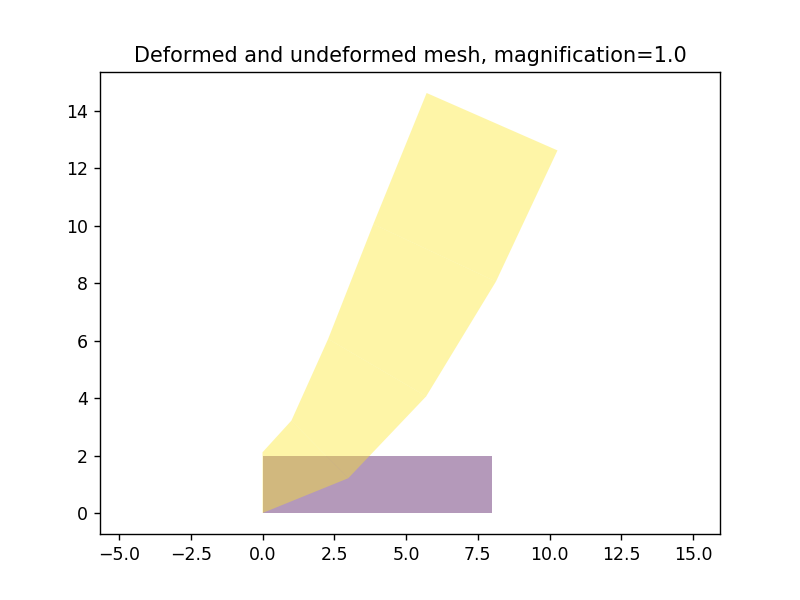

<IPython.core.display.Javascript object>


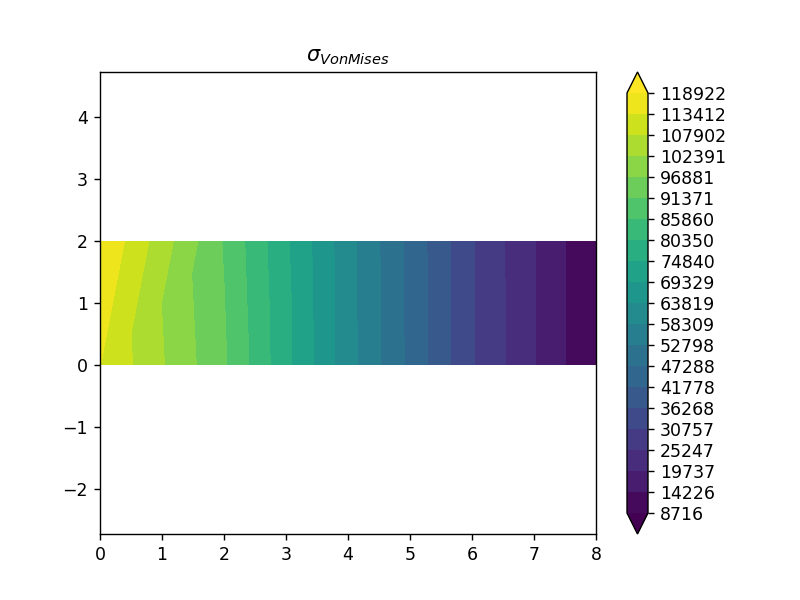

<IPython.core.display.Javascript object>


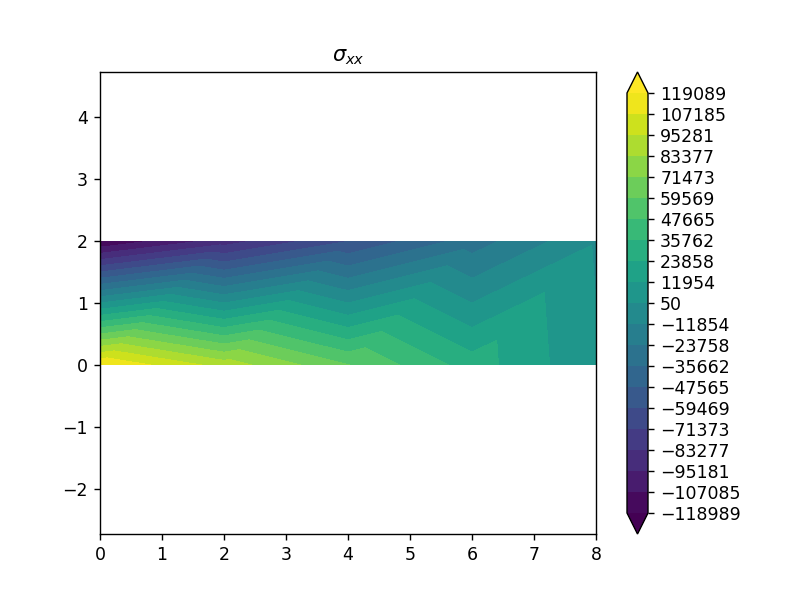

<IPython.core.display.Javascript object>


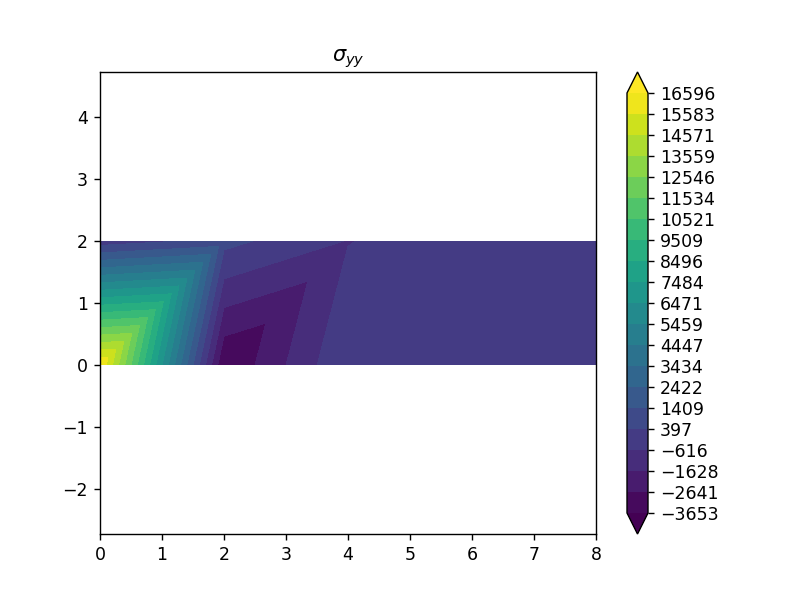

<IPython.core.display.Javascript object>


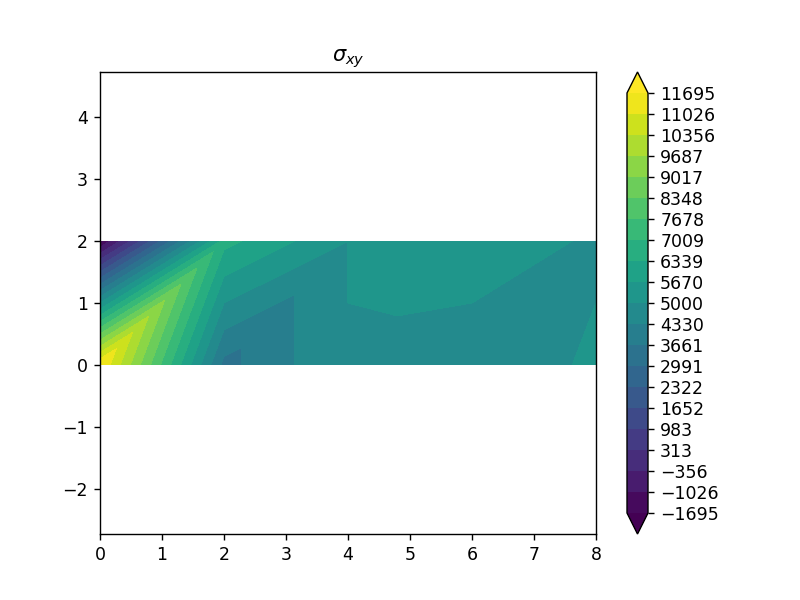

In [63]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull100_bend10k')

u100_10k = U
VonMises100_10k = VonMises
SXX100_10k = SXX

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0013 seconds.
Done assembling K and F    :   0.0080 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


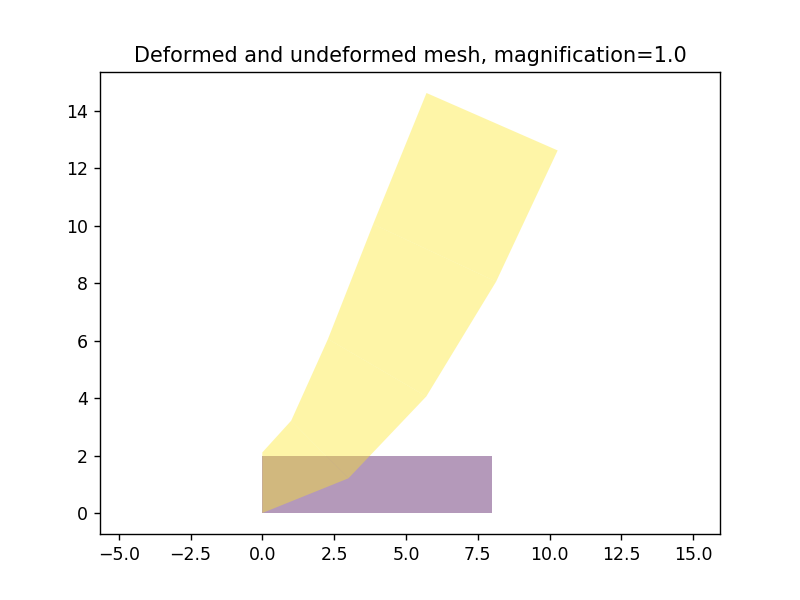

<IPython.core.display.Javascript object>


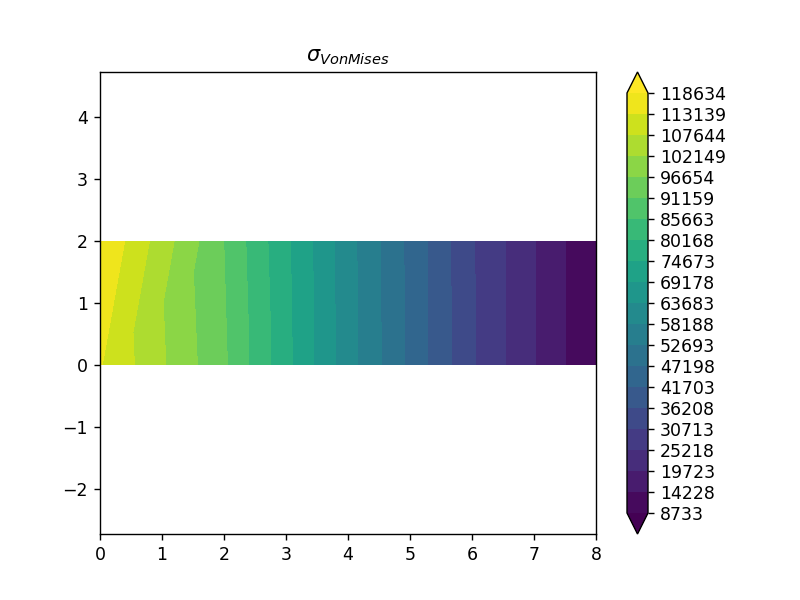

<IPython.core.display.Javascript object>


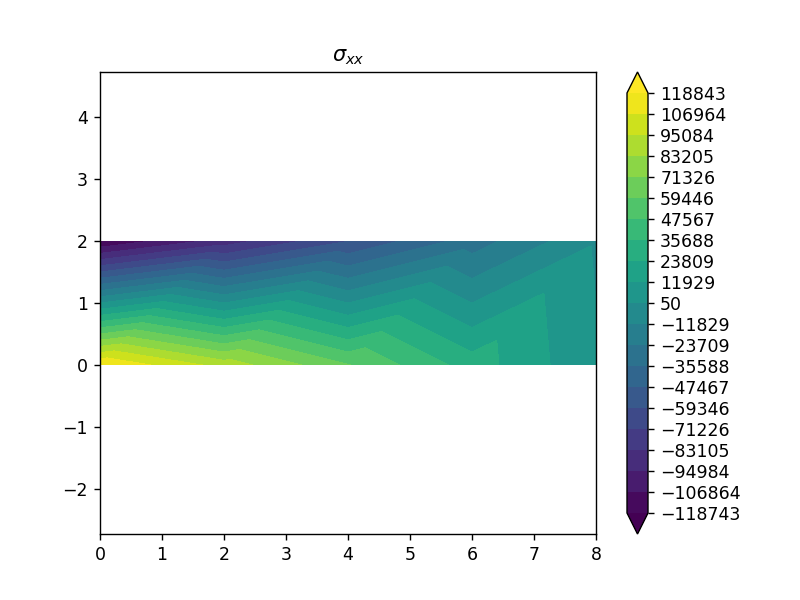

<IPython.core.display.Javascript object>


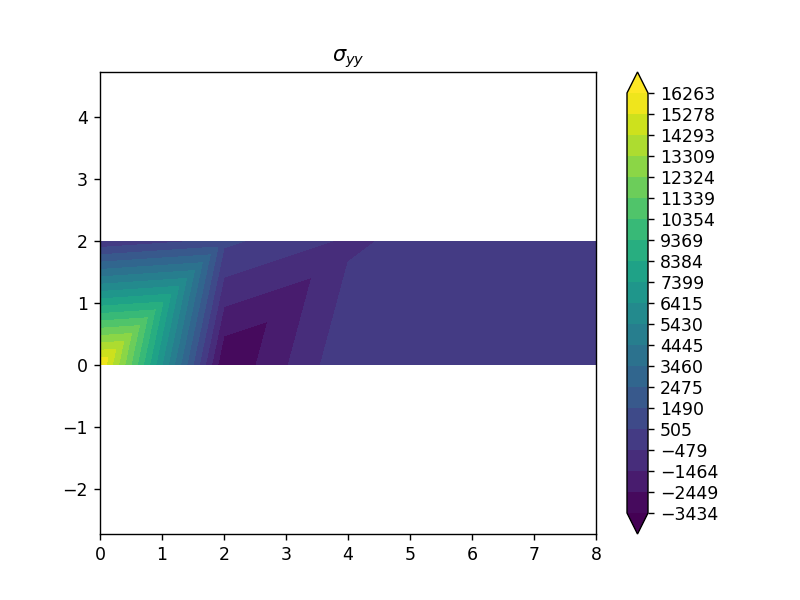

<IPython.core.display.Javascript object>


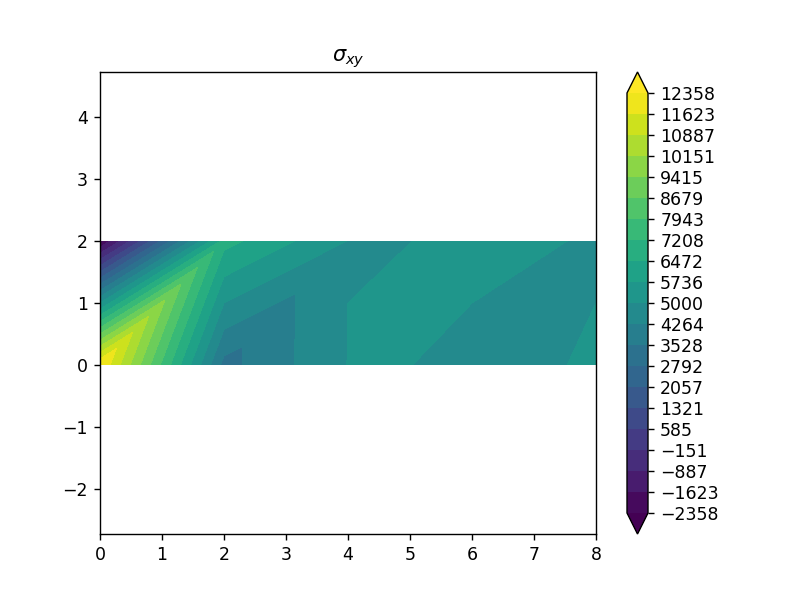

In [64]:
%matplotlib notebook
import numpy as np
from fem_main_program import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('Q8_pull100_bend10k_AL')

u100_10k_AL = U
VonMises100_10k_AL = VonMises
SXX100_10k_AL = SXX

In [65]:
u100_10k_AL / u100_10k

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[        nan],
       [        nan],
       [ 1.01966839],
       [ 0.98513328],
       [ 1.0112529 ],
       [ 0.99688928],
       [ 1.00664254],
       [ 0.99859683],
       [ 1.00549611],
       [ 0.99904173],
       [ 1.00470794],
       [ 0.99929099],
       [ 1.00468734],
       [ 0.99948051],
       [ 1.00412394],
       [ 0.99957188],
       [ 1.0041787 ],
       [ 0.99961178],
       [        nan],
       [-6.13647482],
       [ 0.4140848 ],
       [ 1.0341792 ],
       [ 0.19584835],
       [ 1.00612713],
       [ 0.17569133],
       [ 1.00124887],
       [ 0.08574887],
       [ 0.99965871],
       [        nan],
       [ 0.9542434 ],
       [ 0.99965402],
       [ 0.98991272],
       [ 1.00151173],
       [ 0.99669221],
       [ 0.99957688],
       [ 0.99855482],
       [ 1.00004   ],
       [ 0.99903571],
       [ 0.99986728],
       [ 0.99932007],
       [ 1.00017881],
       [ 0.99949527],
       [ 0.99985625],
       [ 0.99957849],
       [ 1.00001067],
       [ 0